<img src="https://raw.githubusercontent.com/rhatiro/Credit-score/main/ebac-course-utils/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Profissão: Cientista de Dados**
### **Módulo 8** | Git / GitHub - Controle de versionamento | Exercício 3

**Aluno:** Jonatan Agne de Freitas<br>
**Data de entrega:** 20 de junho de 2024.<br>
**Última atualização:** 20 de junho de 2024.

---

# <div style="text-align:center"> Projeto 01 - Concessão de cartões de crédito </div>

## Índice <a name="Contents"></a>

- [Etapa 1 CRISP - DM: Entendimento do negócio](#1)
- [Etapa 2 & 3 Crisp-DM: Entendimento e preparação dos dados](#2e3)
    > - [Import das bibliotecas/pacotes](#import)
    > - [Leitura e pré-processamento dos dados](#leitura)
    > - [Entendimento dos dados - Análise univariada](#univariada)
    >> - [Gráficos de barras](#barras)
    >> - [Histogramas](#histogramas)
    > - [Entendimento dos dados - Análise bivariada](#bivariada)
    > - [Quantidade de categorias por variável](#qtd_categorias)
    > - [Conversão das variáveis categóricas em variáveis numéricas (dummies)](#dummies)
- [Etapa 4 e 5 Crisp-DM: Modelagem & Avaliação dos resultados](#4e5)
    > - [Dividindo a base em treino e teste](#train_test_split)
    > - [RandomForestClassifier](#RFC)
    > - [DecisionTreeClassifier #1](#DTC1)
    > - [DecisionTreeClassifier #2](#DTC2)
- [Etapa 6 Crisp-DM: Implantação](#6)

---

## Etapa 1 CRISP - DM: Entendimento do negócio <a name="1"></a>

**Este é um problema de concessão de cartões de crédito**, publicado no [Kaggle](https://www.kaggle.com/), uma plataforma que promove desafios de ciência de dados, oferecendo prêmios em dinheiro para os melhores colocados. O link original está [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).  
  
Essa é uma base de proponentes de cartão de crédito. **O objetivo é construir um modelo preditivo para identificar o risco de inadimplência** (tipicamente definida pela ocorrência de um atraso maior ou igual a 90 em um horizonte de 12 meses) através de variáveis que podem ser observadas na data da avaliação do crédito (tipicamente quando o cliente solicita o cartão).

Atividades do CRISP-DM:

- Objetivos do negócio
> Note que o objetivo aqui é que o modelo sirva o mutuário (o cliente) para que avalie suas próprias decisões, e não a instituição de crédito.
- Objetivos da modelagem
> O objetivo está bem definido: desenvolver o melhor modelo preditivo de modo a auxiliar o mutuário a tomar suas próprias decisões referentes a crédito.

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

---

## Etapa 2 & 3 Crisp-DM: Entendimento e preparação dos dados <a name="2e3"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

### Dicionário de dados

| Variable Name            | Description                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| sexo| M = 'Masculino'; F = 'Feminino' |M/F|
| posse_de_veiculo| Y = 'possui'; N = 'não possui' |Y/N|
| posse_de_imovel| Y = 'possui'; N = 'não possui' |Y/N|
| qtd_filhos| Quantidade de filhos |inteiro|
| tipo_renda|Tipo de renda (ex: assaliariado, autônomo etc) | texto |
| educacao| Nível de educação (ex: secundário, superior etc) |texto|
| estado_civil | Estado civil (ex: solteiro, casado etc)| texto |
| tipo_residencia | tipo de residência (ex: casa/apartamento, com os pais etc) | texto |
| idade | idade em anos |inteiro|
| tempo de emprego | tempo de emprego em anos |inteiro|
| possui_celular | Indica se possui celular (1 = sim, 0 = não) |binária|
| possui_fone_comercial | Indica se possui telefone comercial (1 = sim, 0 = não) |binária|
| possui_fone | Indica se possui telefone (1 = sim, 0 = não) |binária|
| possui_email | Indica se possui e-mail (1 = sim, 0 = não) |binária|
| qt_pessoas_residencia | quantidade de pessoas na residência |inteiro|
| **mau** | indicadora de mau pagador (True = mau, False = bom) |binária|





### Import das bibliotecas/pacotes <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn import metrics

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

%matplotlib inline

### Leitura e pré-processamento dos dados <a name="leitura"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [9]:
df = pd.read_csv('previsao renda.csv')

print('Quantidade de linhas e colunas do dataframe:\n', 
      df.shape[0], 'linhas \n', 
      df.shape[1], 'colunas \n'
     )

print('Quantidade de linhas duplicadas:', 
      df.duplicated().sum())

df.drop_duplicates(inplace=True)

print('Quantidade de linhas após remoção:', 
      len(df), '\n')

df.reset_index(drop=True, inplace=True)

print(df.info())

df

Quantidade de linhas e colunas do dataframe:
 15000 linhas 
 16 colunas 

Quantidade de linhas duplicadas: 0
Quantidade de linhas após remoção: 15000 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


### Entendimento dos dados - Análise univariada <a name="univariada"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

Distribuição da variável resposta (mau):
mau
Adimplentes      14638
Inadimplentes      362
Name: count, dtype: int64

Distribuição percentual da variável resposta (mau):
mau
Adimplentes      97.59
Inadimplentes     2.41
Name: proportion, dtype: float64


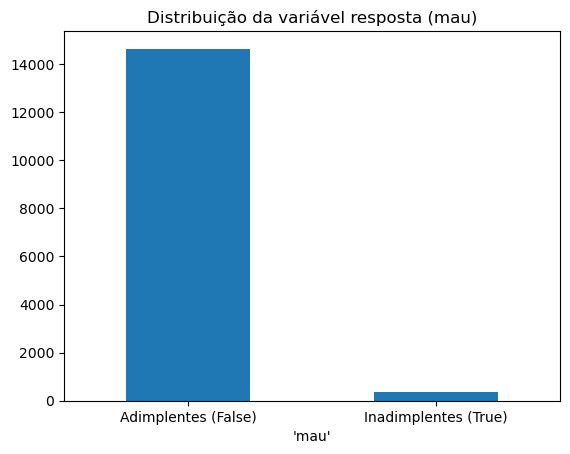

In [10]:
print('Distribuição da variável resposta (mau):')
print(df.mau.value_counts().rename(
    {False: 'Adimplentes', 
     True: 'Inadimplentes'}))

print('\nDistribuição percentual da variável resposta (mau):')
print(round(df.mau.value_counts(normalize=True).rename(
    {False: 'Adimplentes', 
     True: 'Inadimplentes'}) * 100, 2))

df['mau'].value_counts().plot.bar(rot=0)
plt.title(label='Distribuição da variável resposta (mau)')
plt.xlabel(xlabel="'mau'")
plt.xticks(ticks=[0,1], 
           labels=['Adimplentes (False)', 'Inadimplentes (True)'])
plt.show()

#### Gráficos de barras <a name="barras"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

posse_de_veiculo
False    9167
True     5833
Name: count, dtype: int64


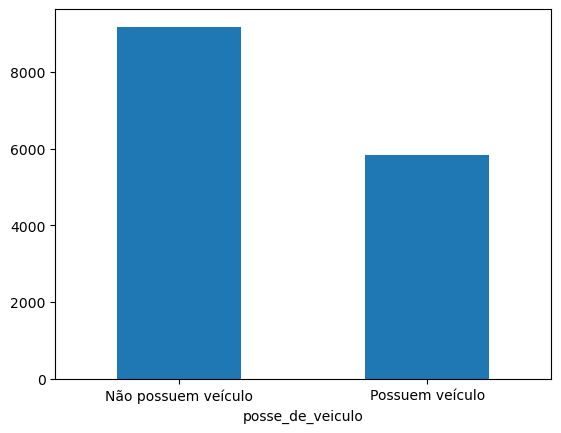

In [11]:
print(df['posse_de_veiculo'].value_counts())

df['posse_de_veiculo'].value_counts().plot.bar(rot=0)
plt.xticks(ticks=[0,1], 
           labels=['Não possuem veículo', 'Possuem veículo'])
plt.show()

posse_de_imovel
True     10082
False     4918
Name: count, dtype: int64


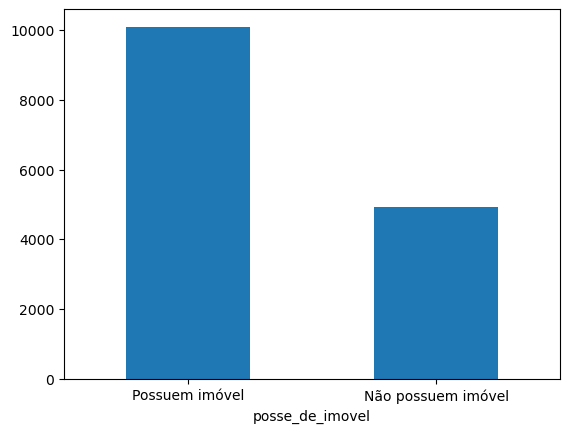

In [12]:
print(df['posse_de_imovel'].value_counts())

df['posse_de_imovel'].value_counts().plot.bar(rot=0)
plt.xticks(ticks=[0,1], 
           labels=['Possuem imóvel', 'Não possuem imóvel'])
plt.show()

#### Histogramas <a name="histogramas"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

C:\Users\Jonatan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


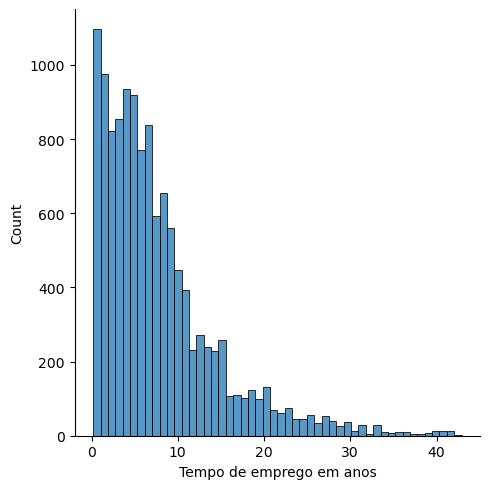

In [13]:
sns.displot(data=df, 
            x="tempo_emprego", 
            bins=50)
plt.xlabel('Tempo de emprego em anos')
plt.show()

#### Alterando valores de -1000 pra -2, para melhor visualização no gráfico:

C:\Users\Jonatan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


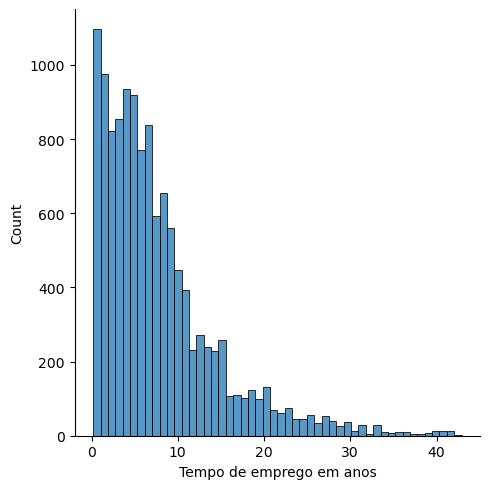

In [14]:
df.loc[df["tempo_emprego"]<0, "tempo_emprego"] = -2

sns.displot(data=df, 
            x="tempo_emprego", 
            bins = 50)
plt.xlabel('Tempo de emprego em anos')
plt.show()

C:\Users\Jonatan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


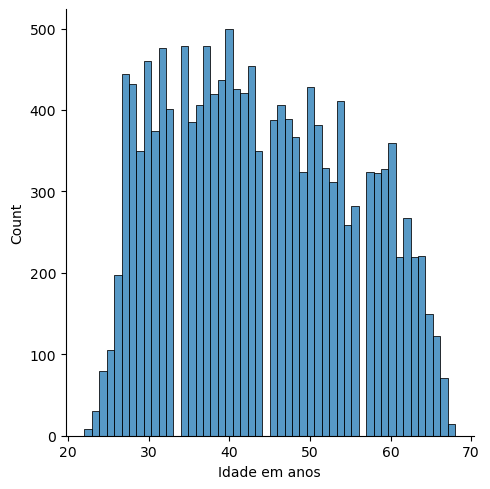

In [15]:
sns.displot(data=df, 
            x="idade", 
            bins=50)
plt.xlabel('Idade em anos')
plt.show()

### Entendimento dos dados - Análise bivariada <a name="bivariada"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

C:\Users\Jonatan\AppData\Local\Temp\ipykernel_15416\1270805827.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df.groupby(cat_srs)


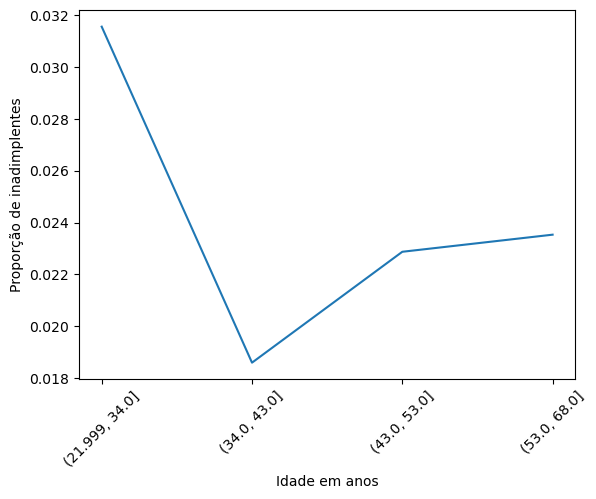

In [16]:
cat_srs, bins = pd.qcut(x=df['idade'], 
                        q=4, 
                        retbins=True)
g = df.groupby(cat_srs)
biv = g['mau'].mean()

ax = biv.plot.line()
ax.set_xlabel(xlabel='Idade em anos')
ax.set_ylabel(ylabel="Proporção de inadimplentes")
ticks = plt.xticks(ticks=range(len(biv.index.values)), 
                   labels=biv.index.values, 
                   rotation=45)

C:\Users\Jonatan\AppData\Local\Temp\ipykernel_15416\3524283439.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df.groupby(cat_srs)


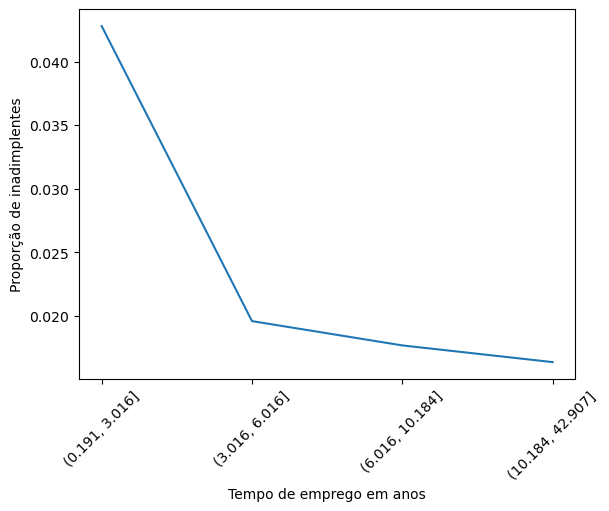

In [17]:
cat_srs, bins = pd.qcut(x=df['tempo_emprego'], 
                        q=4, 
                        retbins=True)
g = df.groupby(cat_srs)
biv = g['mau'].mean()

ax = biv.plot.line()
ax.set_xlabel(xlabel="Tempo de emprego em anos")
ax.set_ylabel(ylabel="Proporção de inadimplentes")
ticks = plt.xticks(ticks=range(len(biv.index.values)), 
                   labels=biv.index.values, 
                   rotation=45)

plt.show()

---

### Quantidade de categorias por variável <a name="qtd_categorias"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [18]:
df_metadados = pd.DataFrame(data=df.dtypes)
df_metadados.columns = ['tipo_dados']

qtd_categorias = []

for coluna in df.columns:
    qtd_categorias.append(df[coluna].nunique())

df_metadados['qtd_categorias'] = qtd_categorias
df_metadados

,tipo_dados,qtd_categorias
Unnamed: 0,int64,15000
data_ref,object,15
index,int64,9837
sexo,object,2
posse_de_veiculo,bool,2
posse_de_imovel,bool,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5


### Conversão das variáveis categóricas em variáveis numéricas (*dummies*) <a name="dummies"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [19]:
df = pd.get_dummies(data=df.copy(), 
                    columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel'], 
                    drop_first=True)

df = pd.get_dummies(data=df)

print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     15000 non-null  int64  
 1   index                          15000 non-null  int64  
 2   qtd_filhos                     15000 non-null  int64  
 3   idade                          15000 non-null  int64  
 4   tempo_emprego                  12466 non-null  float64
 5   qt_pessoas_residencia          15000 non-null  float64
 6   mau                            15000 non-null  bool   
 7   renda                          15000 non-null  float64
 8   sexo_M                         15000 non-null  bool   
 9   posse_de_veiculo_True          15000 non-null  bool   
 10  posse_de_imovel_True           15000 non-null  bool   
 11  data_ref_2015-01-01            15000 non-null  bool   
 12  data_ref_2015-02-01            15000 non-null 

,Unnamed: 0,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda,sexo_M,posse_de_veiculo_True,...,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,0,8682,1,36,3.575342,3.0,False,3369.24,False,False,...,False,False,False,False,False,True,False,False,False,False
1,1,12830,0,42,0.860274,2.0,False,6096.14,True,True,...,False,False,False,False,False,True,False,False,False,False
2,2,2885,2,31,8.065753,4.0,False,5658.98,True,True,...,False,False,False,False,False,True,False,False,False,False
3,3,16168,0,50,1.208219,2.0,False,7246.69,False,True,...,False,False,False,False,False,True,False,False,False,False
4,4,12438,0,52,13.873973,2.0,False,4017.37,True,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,3678,1,37,2.046575,3.0,False,1193.29,True,True,...,False,False,False,False,False,True,False,False,False,False
14996,14996,3405,1,30,12.079452,3.0,False,2519.18,True,True,...,False,False,False,False,False,False,False,False,True,False
14997,14997,7944,0,40,2.161644,2.0,False,1586.85,False,True,...,False,False,False,False,False,True,False,False,False,False
14998,14998,16019,0,47,3.295890,2.0,False,6975.39,False,False,...,False,False,False,False,False,True,False,False,False,False


In [20]:
df.dtypes.to_frame(name='Dtype')

,Dtype
Unnamed: 0,int64
index,int64
qtd_filhos,int64
idade,int64
tempo_emprego,float64
qt_pessoas_residencia,float64
mau,bool
renda,float64
sexo_M,bool
posse_de_veiculo_True,bool


---

## Etapa 4 e 5 Crisp-DM: Modelagem & Avaliação dos resultados <a name="4e5"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

### Dividindo a base em treino e teste <a name="train_test_split"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [22]:
X = df.drop(columns='mau')
print('Quantidade de linhas e colunas das variáveis explicativas (X):', 
      X.shape, '\n')

y = df.mau
print('Quantidade de linhas da variável resposta (y):', 
      len(y), '\n\n')

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=100)

print('Quantidade de linhas e colunas de X_train (70%):', 
      X_train.shape)
print('Quantidade de linhas e colunas de X_test (30%):', 
      X_test.shape, '\n')

print('Quantidade de linhas de y_train (70%):', 
      len(y_train))
print('Quantidade de linhas de y_test (30%):', 
      len(y_test))

Quantidade de linhas e colunas das variáveis explicativas (X): (15000, 46) 

Quantidade de linhas da variável resposta (y): 15000 


Quantidade de linhas e colunas de X_train (70%): (10500, 46)
Quantidade de linhas e colunas de X_test (30%): (4500, 46) 

Quantidade de linhas de y_train (70%): 10500
Quantidade de linhas de y_test (30%): 4500


### RandomForestClassifier <a name="RFC"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [25]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]
X_test = X_test.dropna()
y_test = y_test[X_test.index]

clf = RandomForestClassifier(n_estimators=5)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

In [26]:
y_pred = clf.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 98.66%


#### Matriz de confusão:

In [27]:
tab = pd.crosstab(index = y_pred, 
                  columns = y_test)
tab

mau,False,True
row_0,,
False,3641,49
True,1,47


### DecisionTreeClassifier #1 <a name="DTC1"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [28]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X=X_train, 
              y=y_train)
clf

DecisionTreeClassifier(random_state=100)

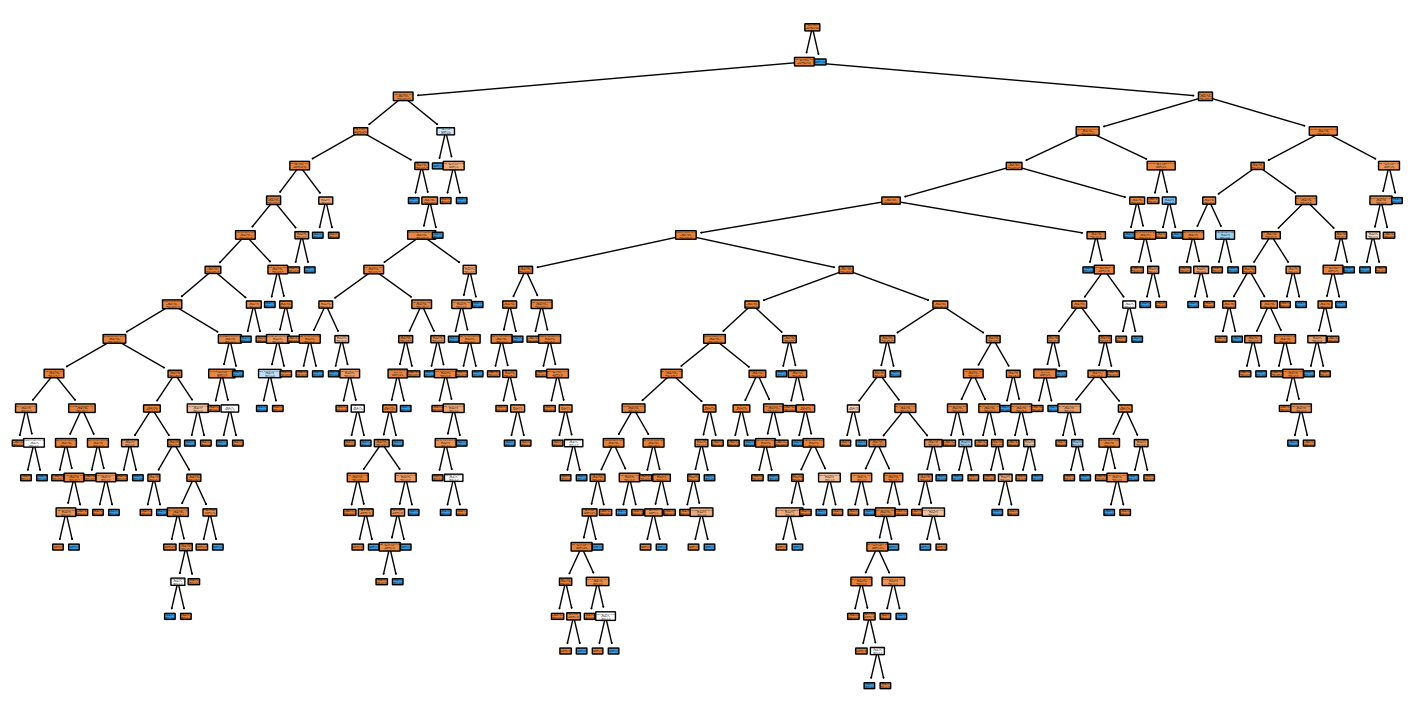

In [29]:
plt.figure(figsize=(18,9))
plot_tree(decision_tree=clf,
          feature_names=X_train.columns,
          class_names=['bons', 'maus'],
          filled=True, 
          rounded=True)

plt.show()

#### Matriz de confusão para a base de treino:

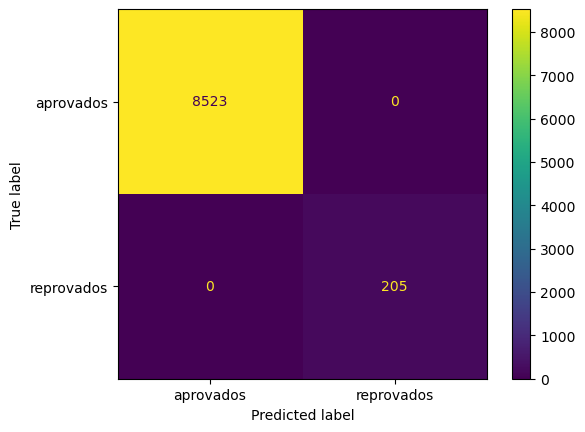

In [30]:
ConfusionMatrixDisplay.from_estimator(estimator=clf, 
                                      X=X_train, 
                                      y=y_train, 
                                      display_labels=['aprovados', 'reprovados'])

plt.show()

#### Acurácia na base de treinamento:

In [31]:
predict_train = clf.predict(X=X_train)
accuracy_score(y_true=y_train, 
               y_pred=predict_train)

1.0

In [32]:
predict_test = clf.predict(X=X_test)

print('Valores preditos:') 
print(pd.Series(predict_test).value_counts(), '\n')

print('Valores reais:')
print(y_test.value_counts())

Valores preditos:
False    3636
True      102
Name: count, dtype: int64 

Valores reais:
mau
False    3642
True       96
Name: count, dtype: int64


#### Matriz de confusão para a base de teste:

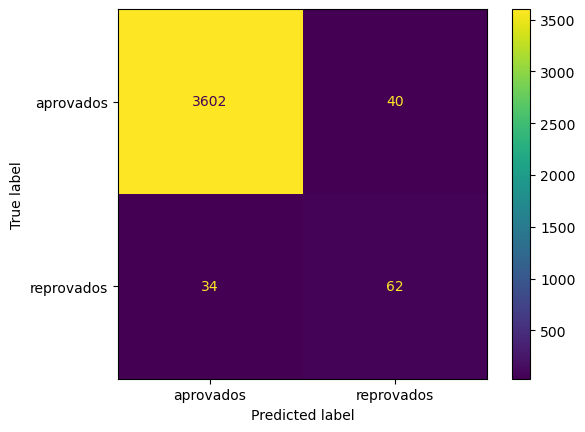

In [33]:
ConfusionMatrixDisplay.from_estimator(estimator=clf, 
                                      X=X_test, 
                                      y=y_test, 
                                      display_labels=['aprovados', 'reprovados'])

plt.show()

#### Comparação da acurácia entre base de treinamento e base de teste:

In [34]:
print('Acurácia da base de treinamento:', 
      accuracy_score(y_true=y_train, 
                     y_pred=predict_train), '\n')

print('Acurácia da base de teste:', 
      accuracy_score(y_true=y_test, 
                     y_pred=predict_test))

Acurácia da base de treinamento: 1.0 

Acurácia da base de teste: 0.980203317281969


### DecisionTreeClassifier #2 <a name="DTC2"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [35]:
nova_clf = DecisionTreeClassifier(max_depth=10, 
                                  min_samples_leaf=5, 
                                  random_state=123)
nova_clf = nova_clf.fit(X=X_train, 
                        y=y_train)
nova_clf

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

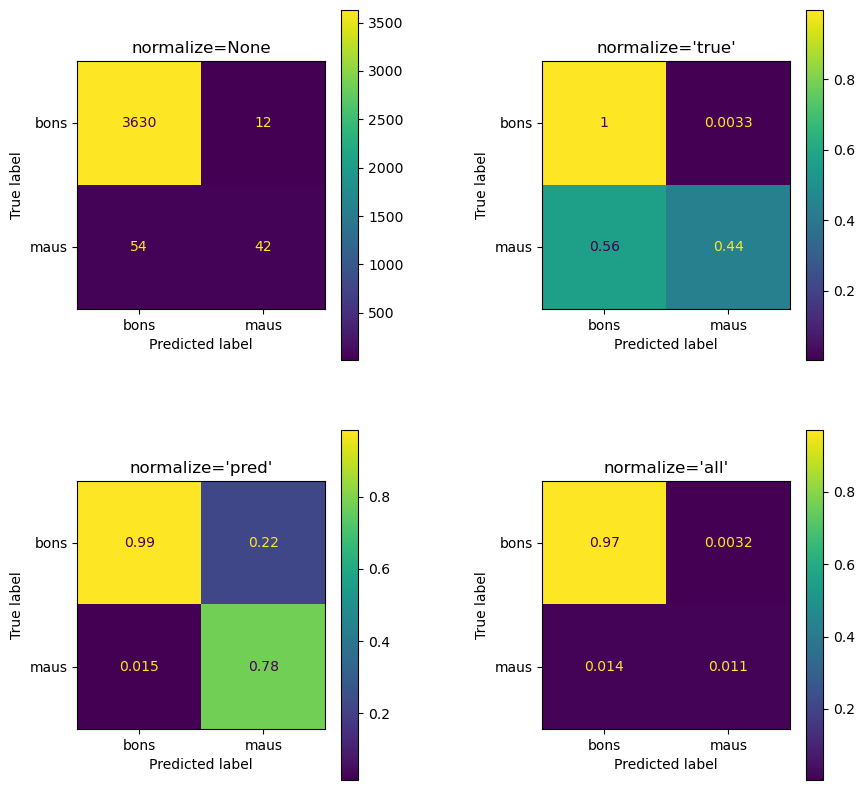

In [36]:
fig, axes = plt.subplots(nrows=2, 
                         ncols=2, 
                         figsize=(10,10))
fig.subplots_adjust(wspace=0.5)

ConfusionMatrixDisplay.from_estimator(estimator=nova_clf, 
                                      X=X_test, 
                                      y=y_test, 
                                      display_labels=['bons', 'maus'], 
                                      normalize=None, 
                                      ax=axes[0,0])
axes[0,0].set_title(label="normalize=None")

ConfusionMatrixDisplay.from_estimator(estimator=nova_clf, 
                                      X=X_test, 
                                      y=y_test, 
                                      display_labels=['bons', 'maus'], 
                                      normalize='true', 
                                      ax=axes[0,1])
axes[0,1].set_title(label="normalize='true'")

ConfusionMatrixDisplay.from_estimator(estimator=nova_clf, 
                                      X=X_test, 
                                      y=y_test, 
                                      display_labels=['bons', 'maus'], 
                                      normalize='pred', 
                                      ax=axes[1,0])
axes[1,0].set_title(label="normalize='pred'")

ConfusionMatrixDisplay.from_estimator(estimator=nova_clf, 
                                      X=X_test, 
                                      y=y_test, 
                                      display_labels=['bons', 'maus'], 
                                      normalize='all', 
                                      ax=axes[1,1])
axes[1,1].set_title(label="normalize='all'")

plt.show()

In [37]:
print("Proporção de proponentes classificados como 'maus':",
      round(7/(1937+87+7)*100, 2), 
      '%')

Proporção de proponentes classificados como 'maus': 0.34 %


#### Acurácia caso todos os contratos fossem classificados como 'bons':

In [38]:
print("Valores reais:")
print(pd.Series(y_test).value_counts(), 
      '\n')

print("Todos os contratos da base teste classificados como 'bons':")
print(pd.Series(y_test.replace(to_replace=True, 
                               value=False)
               ).value_counts(), 
      '\n')

print('Acurácia:', 
      round(accuracy_score(y_true=y_test, 
                           y_pred=y_test.replace(to_replace=True, 
                                                 value=False)
                          ) * 100,
            2), 
      '%')

Valores reais:
mau
False    3642
True       96
Name: count, dtype: int64 

Todos os contratos da base teste classificados como 'bons':
mau
False    3738
Name: count, dtype: int64 

Acurácia: 97.43 %


---

## Etapa 6 Crisp-DM: Implantação<a name="6"></a>
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor de crédito que toma as decisões com algum nível de automação - tipicamente aprovando automaticamente clientes muito bons, negando automaticamente clientes muito ruins, e enviando os intermediários para análise manual.

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

---